In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mat = pd.read_csv("data/student-mat.csv")

In [3]:

#     school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
#     sex - student's sex (binary: 'F' - female or 'M' - male)
#     age - student's age (numeric: from 15 to 22)
#     address - student's home address type (binary: 'U' - urban or 'R' - rural)
#     famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
#     Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
#     Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
#     Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
#     Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#     Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#     reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
#     guardian - student's guardian (nominal: 'mother', 'father' or 'other')
#     traveltime - home to school travel time (numeric: 1 - 1 hour)
#     studytime - weekly study time (numeric: 1 - 10 hours)
#     failures - number of past class failures (numeric: n if 1<=n<3, else 4)
#     schoolsup - extra educational support (binary: yes or no)
#     famsup - family educational support (binary: yes or no)
#     paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
#     activities - extra-curricular activities (binary: yes or no)
#     nursery - attended nursery school (binary: yes or no)
#     higher - wants to take higher education (binary: yes or no)
#     internet - Internet access at home (binary: yes or no)
#     romantic - with a romantic relationship (binary: yes or no)
#     famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
#     freetime - free time after school (numeric: from 1 - very low to 5 - very high)
#     goout - going out with friends (numeric: from 1 - very low to 5 - very high)
#     Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#     Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#     health - current health status (numeric: from 1 - very bad to 5 - very good)
#     absences - number of school absences (numeric: from 0 to 93)

# These grades are related with the course subject, Math or Portuguese:

#     G1 - first period grade (numeric: from 0 to 20)
#     G2 - second period grade (numeric: from 0 to 20)
#     G3 - final grade (numeric: from 0 to 20, output target)


In [4]:
mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
mat.isna().sum()/mat.shape[0]*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

In [9]:
# Luckly data has no NA

In [12]:
mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [10]:
mat.head().transpose()
# I used transpose to list all columns

0        1        2         3       4
school           GP       GP       GP        GP      GP
sex               F        F        F         F       F
age              18       17       15        15      16
address           U        U        U         U       U
famsize         GT3      GT3      LE3       GT3     GT3
Pstatus           A        T        T         T       T
Medu              4        1        1         4       3
Fedu              4        1        1         2       3
Mjob        at_home  at_home  at_home    health   other
Fjob        teacher    other    other  services   other
reason       course   course    other      home    home
guardian     mother   father   mother    mother  father
traveltime        2        1        1         1       1
studytime         2        2        2         3       2
failures          0        0        3         0       0
schoolsup       yes       no      yes        no      no
famsup           no      yes       no       yes     yes
paid             no       no      yes       yes     yes
activities       no       no       no       yes      no
nursery         yes       no      yes       yes     yes
higher          yes      yes      yes       yes     yes
internet         no      yes      yes       yes      no
romantic         no       no       no       yes      no
famrel            4        5        4         3       4
freetime          3        3        3         2       3
goout             4        3        2         2       2
Dalc              1        1        2         1       1
Walc              1        1        3         1       2
health            3        3        3         5       5
absences          6        4       10         2       4
G1                5        5        7        15       6
G2                6        5        8        14      10
G3                6        6       10        15      10

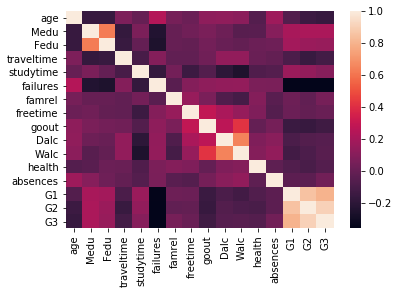

In [11]:
corrmat = mat.corr()
sns.heatmap(corrmat)

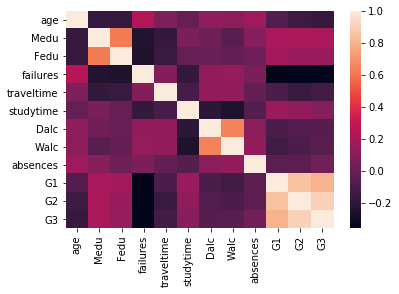

In [24]:
columns = ["age","Medu","Fedu","failures","traveltime","studytime","Dalc","Walc","absences","G1","G2","G3"]
subset = mat[columns]
s_corr = subset.corr()
sns.heatmap(s_corr)

<Figure size 432x288 with 0 Axes>

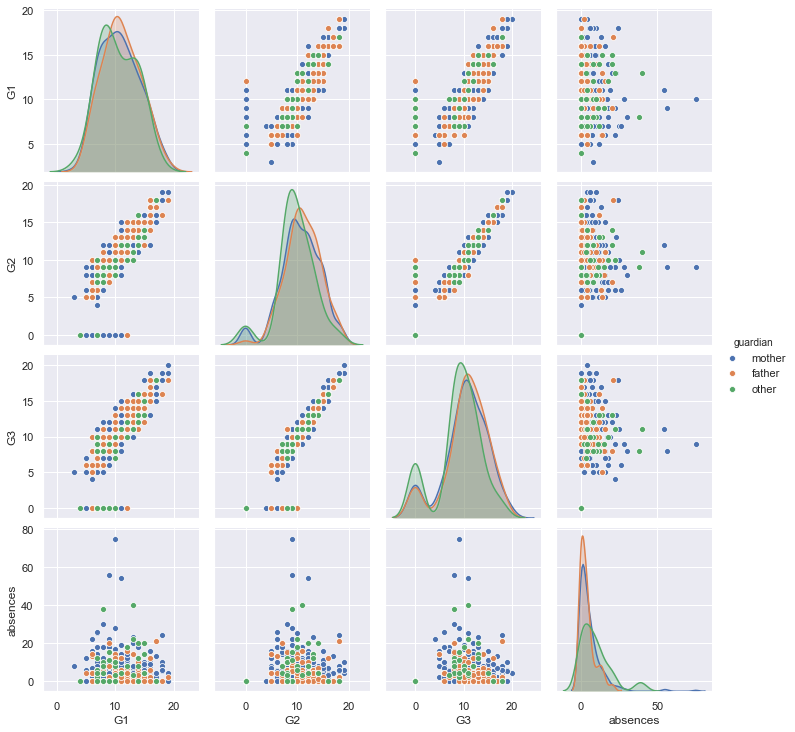

In [28]:
cat_col = ['guardian']
for col in cat_col :
    sns.set()
    cols = ["G1","G2","G3","absences"]
    plt.figure()
    sns.pairplot(mat[cols + [col]],hue = col)
    plt.show()

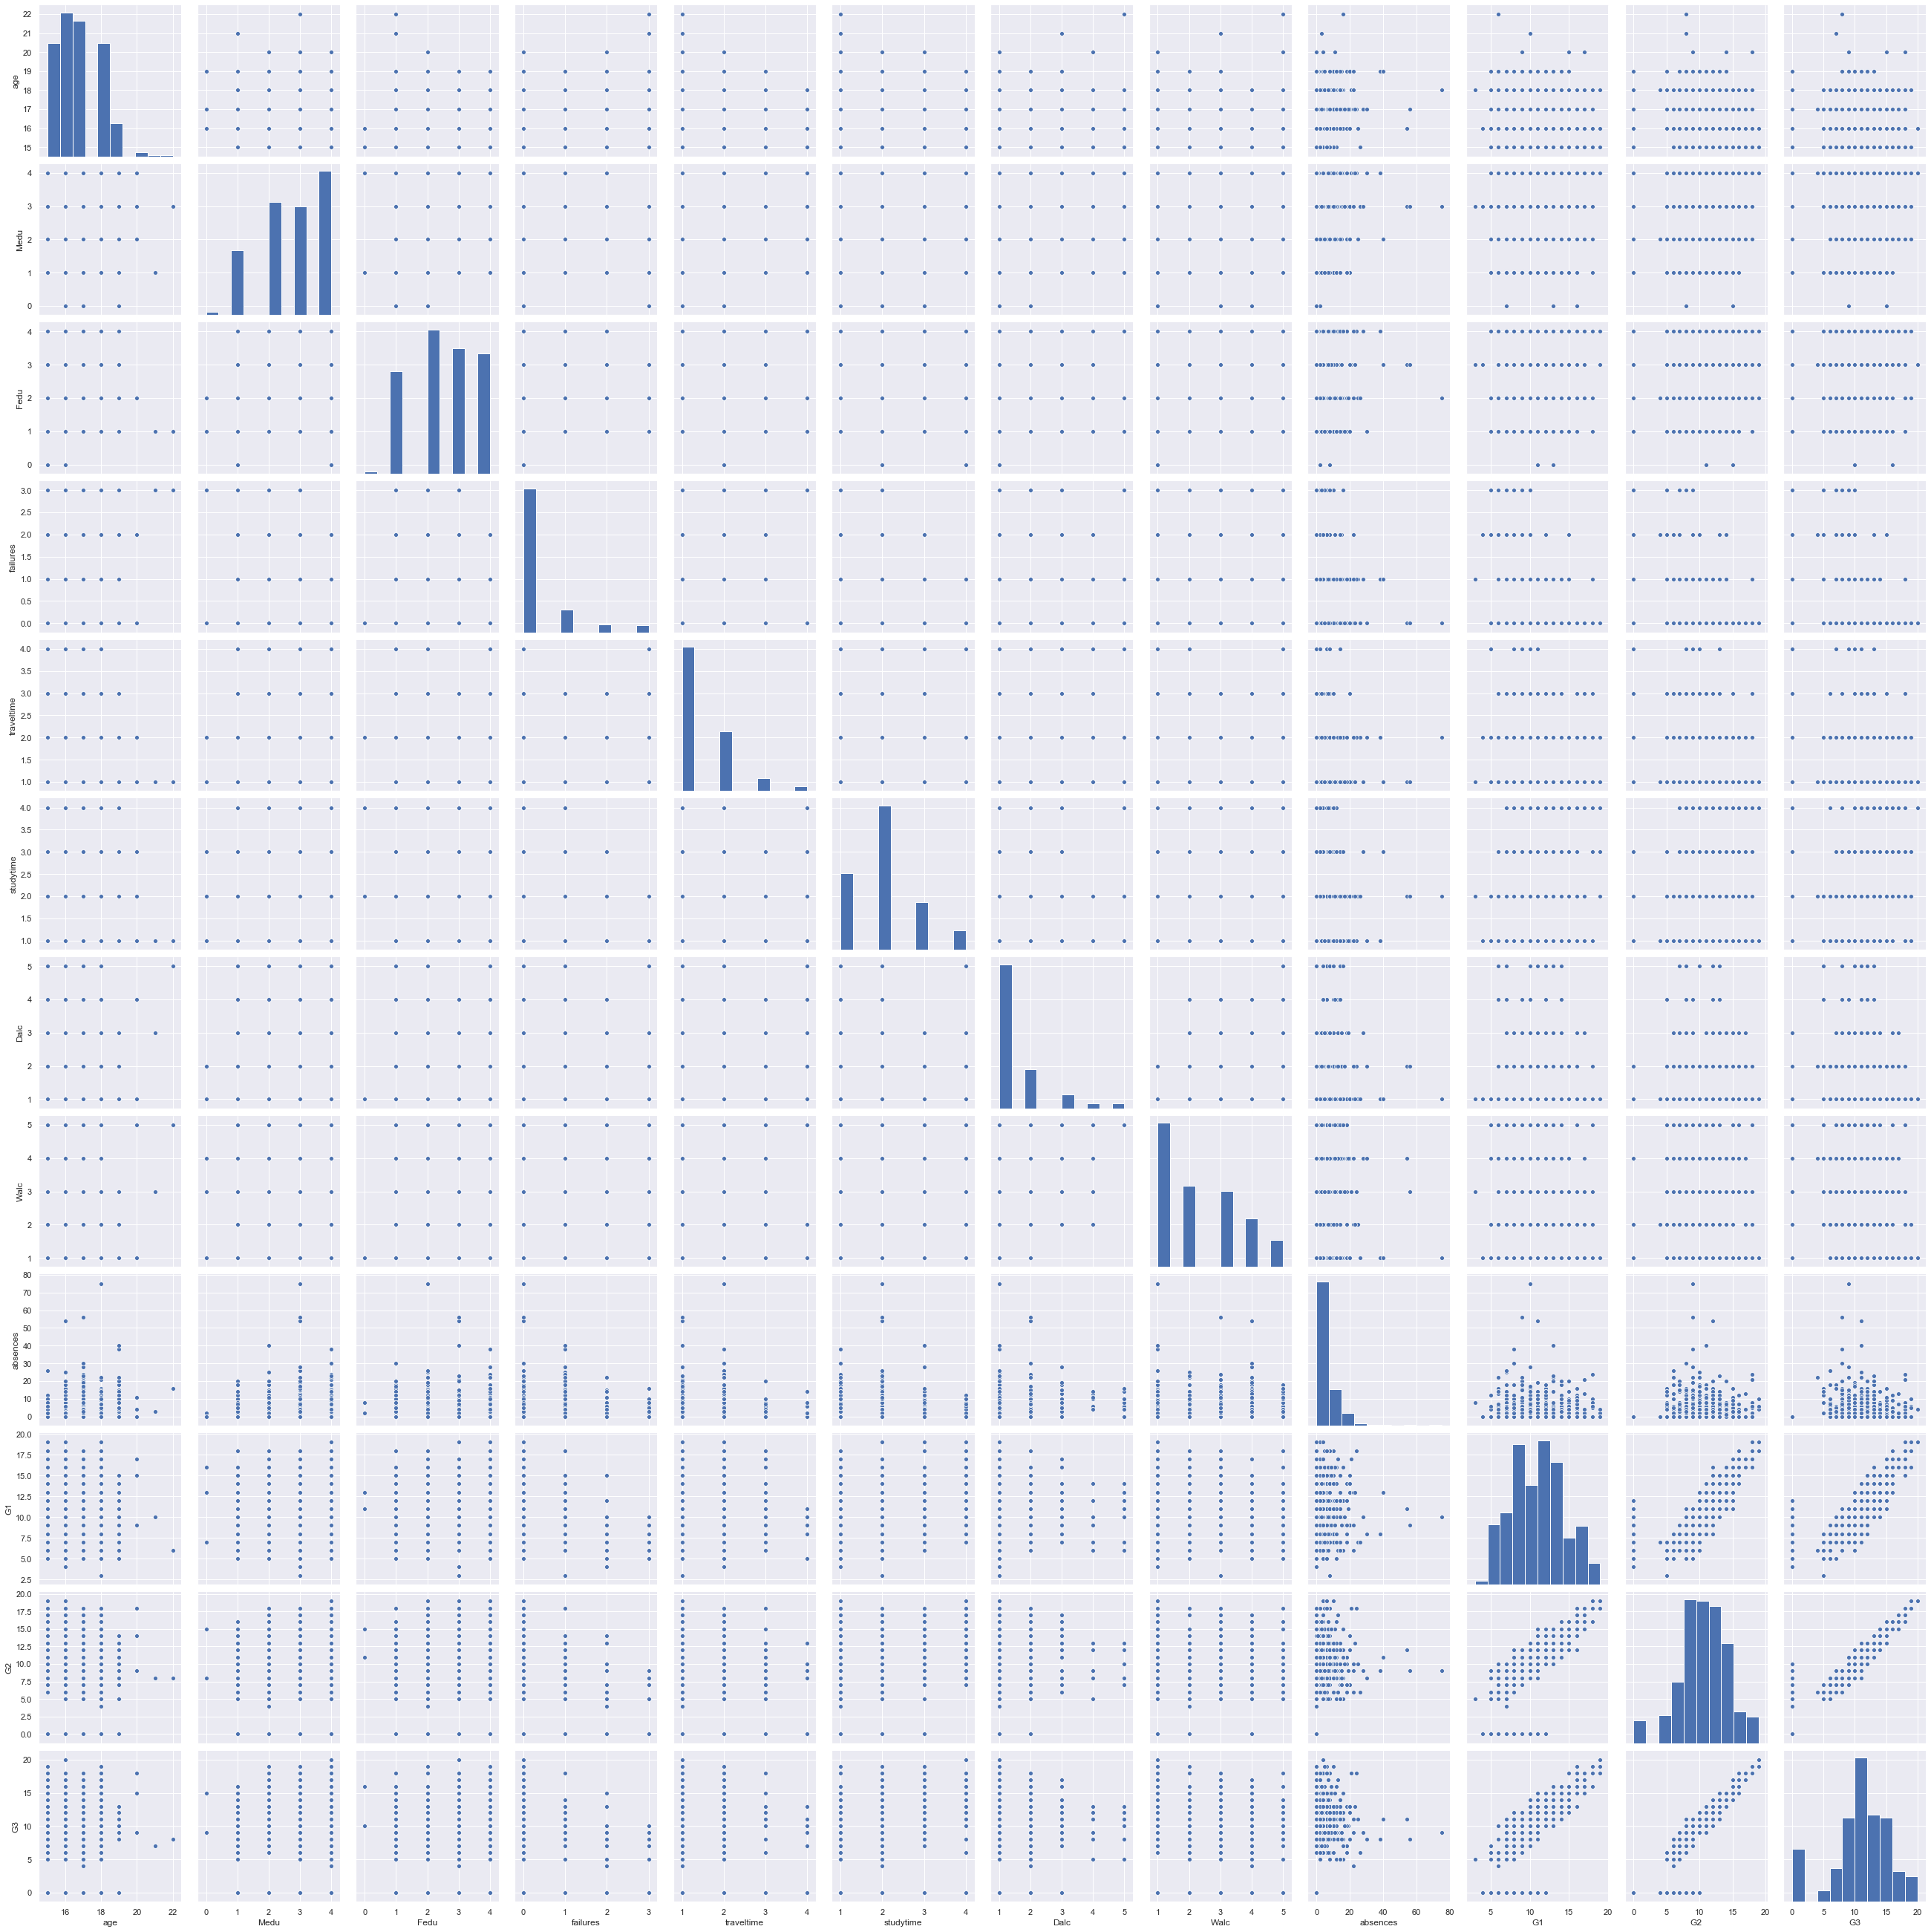

In [41]:
sns.pairplot(subset,size= 3.0)


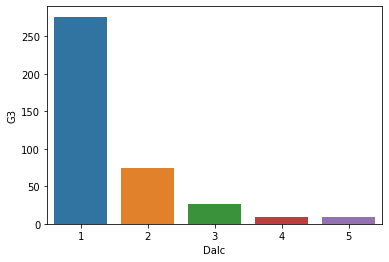

In [18]:
b= mat.groupby(["Dalc"]).count()
sns.barplot(x="Dalc",y= "G3",data=b.reset_index())